<a href="https://colab.research.google.com/github/Istiak1992/ML/blob/main/fakenewsdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')

**Load Data set**

In [3]:
from google.colab import files
uploaded = files.upload()


Saving WELFake_Dataset.csv to WELFake_Dataset.csv


In [4]:
data = pd.read_csv('WELFake_Dataset.csv')
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
data.isnull().sum()

,0
title,558
text,39
label,0


**Handle null values**

In [10]:
data.fillna(' ', inplace=True)
features = data[['title', 'text']]
labels = data['label']

In [11]:
data.isnull().sum()

,0
title,0
text,0
label,0


In [12]:
label_Status = data['label'].value_counts()
transactions = label_Status.index
quantity = label_Status.values

figure = px.pie(data,
             values=quantity,
             names=transactions, hole =.60,
             title="Spam & Ham Status")
figure.show()

**Create Word Cloud**

In [13]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

fake_text = ' '.join(data[data['label'] == 0]['text'])
real_text = ' '.join(data[data['label'] == 1]['text'])

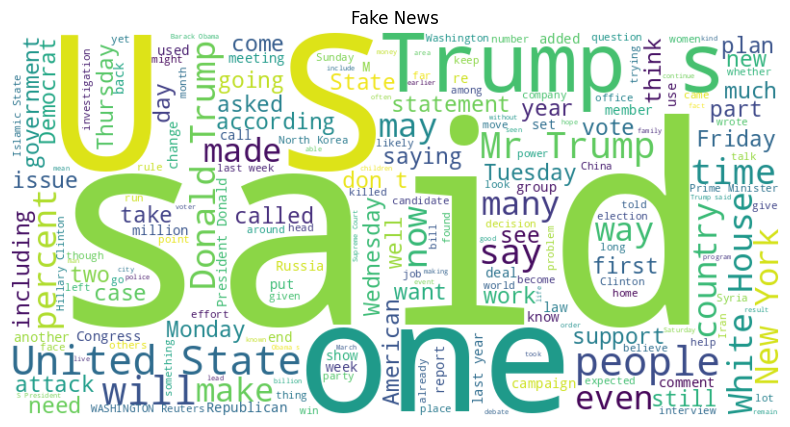

In [14]:
plot_wordcloud(fake_text, 'Fake News')
plt.show()

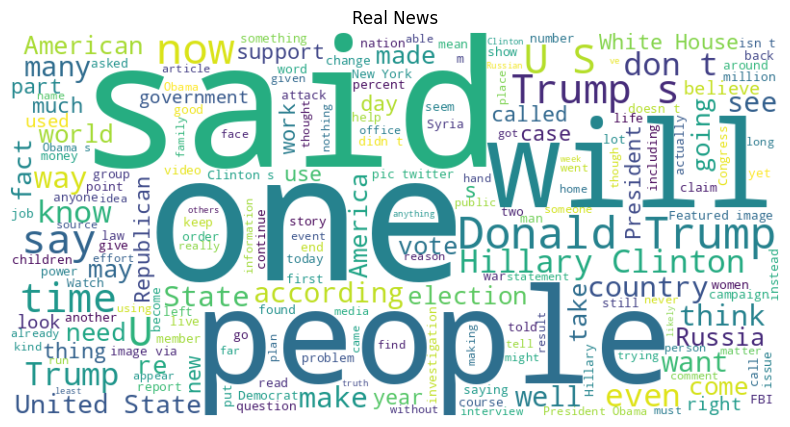

In [15]:
plot_wordcloud(real_text, 'Real News')
plt.show()

# **Preprocessing**

In [16]:
text_column = "text"
label_column = "label"

In [17]:
import nltk
nltk.download('stopwords')

stopword = set(stopwords.words('english'))
stopword

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [18]:
def preprocess_text(text):
    # Remove punctuation
    remove_punc = [char for char in text if char not in string.punctuation]
    clean_words = ''.join(remove_punc) # char joining

    #Remove stopwords
    text = ([word for word in clean_words.split() if word.lower() not in stopword]) # stopword = stopwords.words('english')
    return text


In [19]:
data[text_column] = data[text_column].apply(preprocess_text)
data[text_column]

,text
0,"[comment, expected, Barack, Obama, Members, FY..."
1,"[post, votes, Hillary, already]"
2,"[demonstrators, gathered, last, night, exercis..."
3,"[dozen, politically, active, pastors, came, pr..."
4,"[RS28, Sarmat, missile, dubbed, Satan, 2, repl..."
...,...
72129,"[WASHINGTON, Reuters, Hackers, believed, worki..."
72130,"[know, fantasyland, Republicans, never, questi..."
72131,"[Migrants, Refuse, Leave, Train, Refugee, Camp..."
72132,"[MEXICO, CITY, Reuters, Donald, Trump’s, comba..."


**Lemmatization**

In [20]:
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  lemmatized_text = ''.join([lemmatizer.lemmatize(word) for word in text])
  return lemmatized_text

data[text_column] = data[text_column].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [21]:
data[text_column]

,text
0,commentexpectedBarackObamaMembersFYF911FukYoFl...
1,postvoteHillaryalready
2,demonstratorgatheredlastnightexercisingconstit...
3,dozenpoliticallyactivepastorcameprivatedinnerF...
4,RS28SarmatmissiledubbedSatan2replaceSS18Flies4...
...,...
72129,WASHINGTONReutersHackersbelievedworkingRussian...
72130,knowfantasylandRepublicansneverquestionedcitiz...
72131,MigrantsRefuseLeaveTrainRefugeeCampHungaryThou...
72132,MEXICOCITYReutersDonaldTrump’scombativestylebu...


**TF-IDF Vectorization**

In [22]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data[text_column])
y = data[label_column]

In [23]:
x

<72134x814415 sparse matrix of type '<class 'numpy.float64'>'
	with 1033212 stored elements in Compressed Sparse Row format>

**Train Test Split**

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Evaluate Naive Bayes Model**

In [25]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    prob = model.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, prob)
    fpr, tpr, thresholds = roc_curve(y_test, prob)
    precision, recall, _ = precision_recall_curve(y_test, prob)
    pr_auc = auc(recall, precision)

    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
    }

**Multinomial Naive**

In [26]:
mnb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
mnb_model.fit(x_train, y_train)

MultinomialNB()

In [27]:
from sklearn.metrics import precision_recall_curve, auc
nb_results = evaluate_model(mnb_model, x_test, y_test)
nb_results

{'Accuracy': 0.6791432730297359,
 'Confusion Matrix': array([[2564, 4525],
        [ 104, 7234]])}

In [28]:
cm = confusion_matrix(y_test, mnb_model.predict(x_test))
cm

array([[2564, 4525],
       [ 104, 7234]])

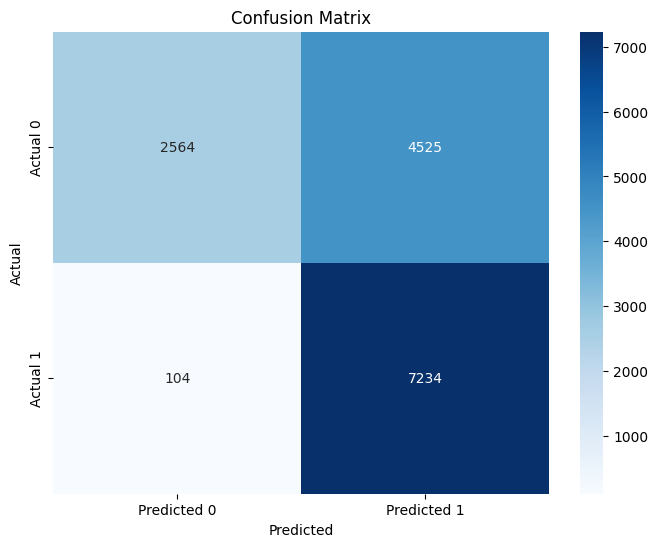

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
print(classification_report(y_test, mnb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.36      0.53      7089
           1       0.62      0.99      0.76      7338

    accuracy                           0.68     14427
   macro avg       0.79      0.67      0.64     14427
weighted avg       0.79      0.68      0.64     14427



**Bernoulli Naive Bayes**

In [31]:
bnb_model = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
bnb_model.fit(x_train, y_train)

BernoulliNB()

In [32]:
bnb_results = evaluate_model(bnb_model, x_test, y_test)
bnb_results

{'Accuracy': 0.5682401053580093,
 'Confusion Matrix': array([[ 879, 6210],
        [  19, 7319]])}

In [33]:
cm_bnb = confusion_matrix(y_test, bnb_model.predict(x_test))
cm_bnb

array([[ 879, 6210],
       [  19, 7319]])

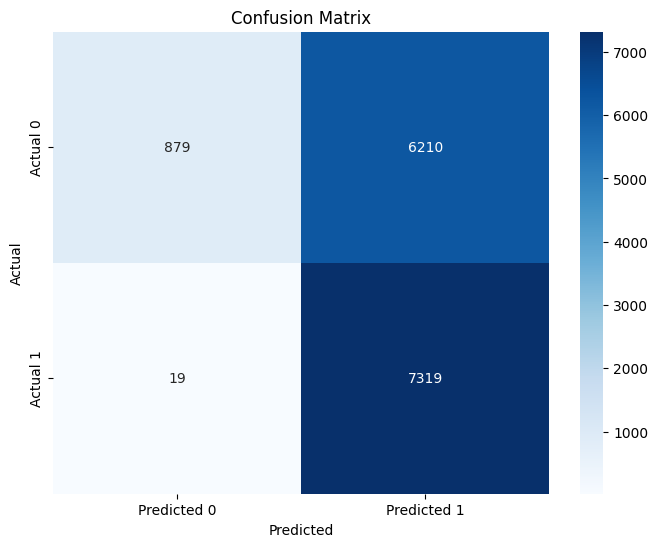

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
print(classification_report(y_test, bnb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.12      0.22      7089
           1       0.54      1.00      0.70      7338

    accuracy                           0.57     14427
   macro avg       0.76      0.56      0.46     14427
weighted avg       0.76      0.57      0.46     14427



**Logistic Regression**

In [36]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
lr_results = evaluate_model(lr_model, x_test, y_test)
lr_results

{'Accuracy': 0.6834407707770154,
 'Confusion Matrix': array([[2862, 4227],
        [ 340, 6998]])}

In [38]:
cm_lr = confusion_matrix(y_test, lr_model.predict(x_test))
cm_lr

array([[2862, 4227],
       [ 340, 6998]])

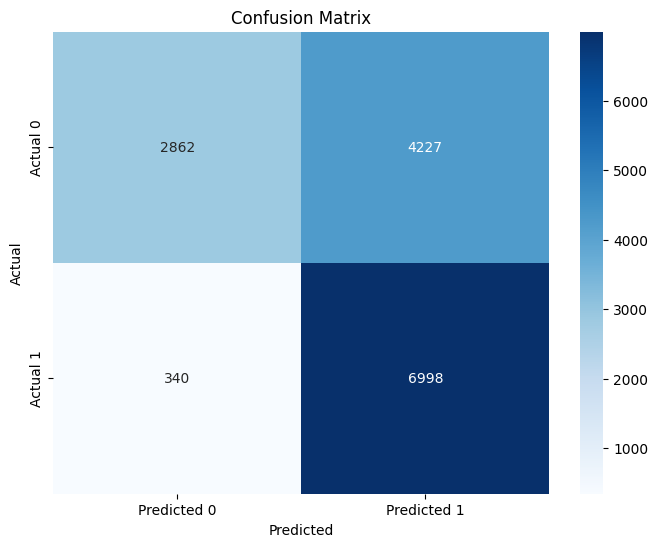

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Compare models**

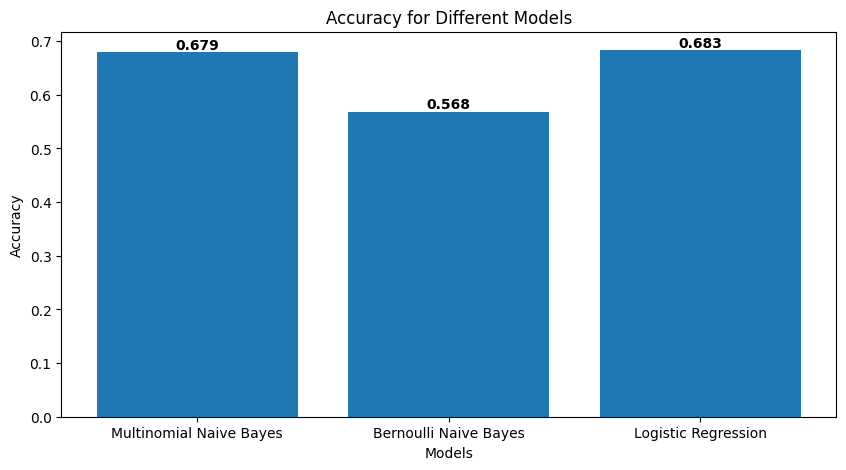

In [40]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')

    plt.show()

accuracy_values = [nb_results['Accuracy'], bnb_results['Accuracy'], lr_results['Accuracy']]
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']
plot_histogram(accuracy_values, model_names, 'Accuracy')

**Prediction Test**

In [41]:
models = [mnb_model, bnb_model, lr_model]

In [43]:
random_text = input()

preprocessed_text = preprocess_text(random_text) # remove punctuation
lemmatized_text = lemmatize_text(preprocessed_text) # text scaling
text_vector = vectorizer.transform([lemmatized_text])

hjsdaf


In [44]:
preprocessed_text

['hjsdaf']

In [45]:
lemmatized_text

'hjsdaf'

In [46]:
text_vector

<1x814415 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [47]:
for model in models:
    prediction = model.predict(text_vector)
    print(f"Model: {type(model).__name__}")
    print("Prediction:", prediction)
    print('\n')

Model: MultinomialNB
Prediction: [1]


Model: BernoulliNB
Prediction: [1]


Model: LogisticRegression
Prediction: [1]




**Pickle**

In [48]:
import pickle

# Define a file path where you want to save the model
model_file_path = 'logistic_regression_model.pkl'

# Save the model to the file
with open(model_file_path, 'wb') as model_file:
    pickle.dump(lr_model, model_file)